In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from model import MWModel

The population model is defined as follows:

$$
\frac{dM}{dt} = r-\frac{1}{\tau_0+\eta b w W}M-b (1-w)MW 
$$
$$
\frac{dW}{dt} = \frac{1}{\tau_0+\eta b w W}M-bwMW 
$$

In [63]:
def run_sim(model, M0, W0, steps=1000, dt=0.01):
    model.set_population(M0, W0)
    
    times = [0]
    traj = [[model.M, model.W]]

    for i in range(steps):
        model.step(dt)
        times.append(times[-1]+dt)
        traj.append([model.M, model.W])

    traj = np.array(traj)    
    
    fig, ax = plt.subplots()
    
    ax.set_xlim(0, times[-1])
    ax.set_xlabel('t')
    ax.set_ylabel('Population')
    ax.set_title('w = {0:.2f}, b = {1:.2f}, tau0 = {2:.2f}, eta = {3:.2f}, r={4:.2f}'.format(
    model.w, model.b, model.t0, model.eta, model.r))
    
    ax.plot(times, traj[:,0], c=(1, 0.5, 0.5), lw=2, label='Magical girls')
    ax.plot(times, traj[:,1], c=(0.2, 0.0, 0.4), lw=2, label='Witches')
    
    ax.axhline(model.eqWpop(), c=(0,0,0), lw=0.5, ls='--')
    
    ax.legend()
    
    return times, traj, fig, ax

<IPython.core.display.Javascript object>


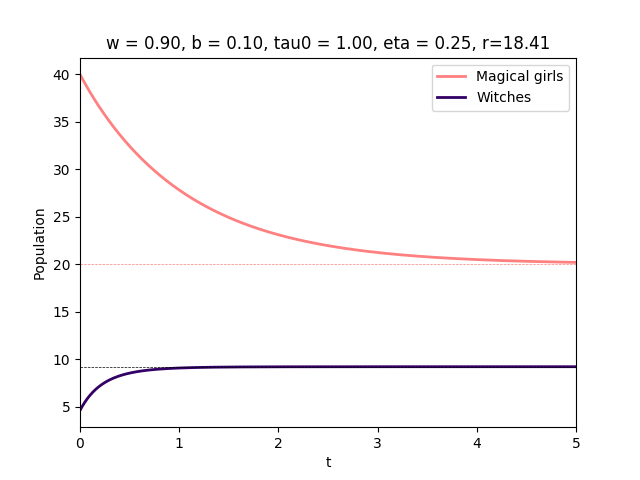

In [64]:
# Model 1

targM = 20
model = MWModel(r=50, w=0.9, b=0.1)
model.r = model.eqTotDecayRate()*targM

times, traj, fig, ax = run_sim(model, targM*2, model.eqWpop()*0.5, dt=0.005, steps=1000)

ax.axhline(targM,  c=(1, 0.5, 0.5), lw=0.5, ls='--')

<IPython.core.display.Javascript object>


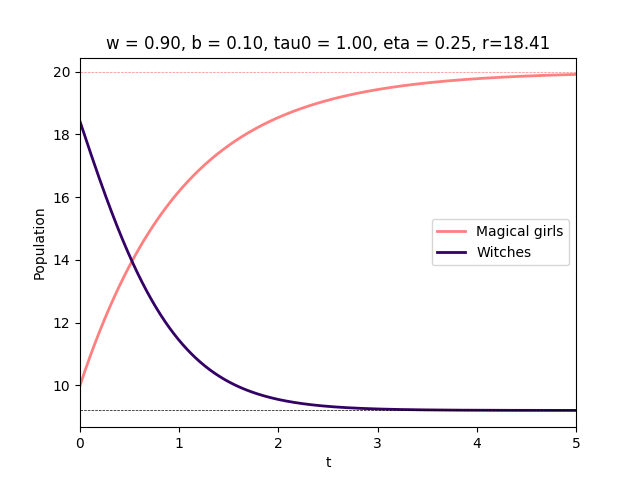

In [65]:
# Model 2

targM = 20
model = MWModel(r=50, w=0.9, b=0.1)
model.r = model.eqTotDecayRate()*targM

times, traj, fig, ax = run_sim(model, targM*0.5, model.eqWpop()*2, dt=0.005, steps=1000)

ax.axhline(targM,  c=(1, 0.5, 0.5), lw=0.5, ls='--')

<IPython.core.display.Javascript object>


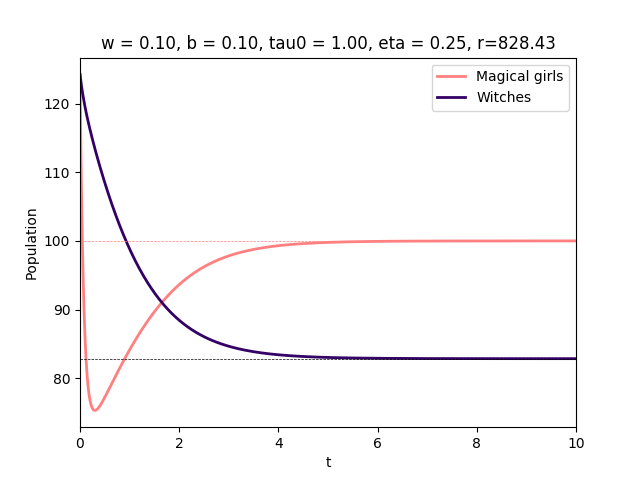

In [68]:
# Model 3

targM = 100
model = MWModel(r=50, w=0.1, b=0.1)
model.r = model.eqTotDecayRate()*targM

times, traj, fig, ax = run_sim(model, model.eqWpop()*1.5, model.eqWpop()*1.5, dt=0.01, steps=1000)

ax.axhline(targM,  c=(1, 0.5, 0.5), lw=0.5, ls='--')